# Utilizing player age & experience level to predict average playtime

## Introduction

Video games have exploded in popularity in recent years, becoming a dominant form of entertainment and fostering massive global communities. With the rise of multiplayer online games like Minecraft, understanding player behavior has become crucial for managing servers and optimizing resources. This project leverages data on player activity to uncover patterns and inform strategies for sustaining engagement.


In the project, we will address: **Can we predict the average hours a player will play?**

We will utilize 2 datasets to determine the player characteristics that are most predictive of high data contribution. Moreover, the Pacific Laboratory for Artificial Intelligence (PLAI) at UBC collected the data for the 2 datasets by setting up a Minecraft server where players actions are recorded as they navigate through the world. 

---

### Dataset #1: players.csv (A list of all unique players, including data about each player)

- Number of observations: 196
- Number of variables: 9

| Variable | Type | Description |
|:--------:|:--------:|:--------:|
|  experience   |  categorical   |  Player's experience level (e.g., Beginner, Amateur, Regular, Veteran, Pro)  |
|  subscribe   |  categorical  |  Indicates whether the player subscribes to a service (TRUE/FALSE)   |
|  hashedEmail   |  categorical   |  Unique identifier for each player  |
|  played_hours   |  quantitative   |  Total hours played by the player  |
|  name   |  categorical   |  Name of the player  |
|  gender   |  categorical   |  Gender of the player (e.g., Male, Female, Non-binary, Prefer not to say)  |
|  age   |  quantitative   |  Age of the player  |
|  individualId   |  categorical   |  Unique individual ID  |
|  organizationName   |  categorical   |  Identifier for the organization the player may be associated with (if any)  |

---

### Dataset #2: sessions.csv (A list of individual play sessions by each player, including data about the session)

- Number of observations: 1535
- Number of variables: 5

| Variable | Type | Description |
|:--------:|:--------:|:--------:|
|  hashedEmail   |  categorical   |  Unique identifier for each player  |
|  start_time   |  quantitative  |  The start time of each play session  |
|  end_time   |  quantitative   |  The end time of each play session  |
|  original_start_time   |  quantitative   |  Scheduled start time (UNIX timestamp format)  |
|  original_end_time   |  quantitative   |  Scheduled end time (UNIX timestamp format)  |

---

Furthermore, we will use **age** and **experience** from the players.csv dataset as predictors to predict the average hours a player will play in Minecraft.

## Methods & Results

#### Preliminary exploratory data analysis:

Step 1) Imported libraries along with player & session data from google drive links

Step 2) Cleaned and tidied data by removing irrelevant variables from datasets and adding individual date & time columns

Step 3) Split the data into training and testing sets (only working with the training set until the very end)

Step 4) Summarized the training set to make predictions

Step 5) Visualized the training dataset

**.** **.** **.**

### Preliminary exploratory data analysis:

#### Importing libraries

In [1]:
# importing libraries
library(tidyverse)
library(tidymodels)
library(repr)
library(RColorBrewer)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
── Attaching packages ────────────────────────────────────── tidymodels 1.1.1 ──

✔ broom        1.0.6     ✔ rsample      1.2.1
✔ dials        1.3.0     ✔ tune         1.1.2
✔ infer        1.0.7     ✔ workflows    1.1.4
✔ modeldata    1.4.0     ✔ workflowsets 1.0.1
✔ parsnip      1.2.1     ✔ yardstick    1.3.1
✔ recipes      1.1.0     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filt

#### Importing Player & Session Datasets

We utilized **read_csv** to import the player & session datasets from the Google Drive URLs

In [2]:
players_url <- "https://drive.google.com/uc?export=download&id=1Mw9vW0hjTJwRWx0bDXiSpYsO3gKogaPz"
sessions_url <- "https://drive.google.com/uc?export=download&id=14O91N5OlVkvdGxXNJUj5jIsV5RexhzbB"

raw_players <- read_csv(players_url)
raw_sessions <- read_csv(sessions_url)

head(raw_players)
head(raw_sessions)

nrow(raw_players)
nrow(raw_sessions)

Rows: 196 Columns: 9
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): experience, hashedEmail, name, gender
dbl (2): played_hours, age
lgl (3): subscribe, individualId, organizationName

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 1535 Columns: 5
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (3): hashedEmail, start_time, end_time
dbl (2): original_start_time, original_end_time

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


experience,subscribe,hashedEmail,played_hours,name,gender,age,individualId,organizationName
<chr>,<lgl>,<chr>,<dbl>,<chr>,<chr>,<dbl>,<lgl>,<lgl>
Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9,NA,NA
Veteran,TRUE,f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9,3.8,Christian,Male,17,NA,NA
Veteran,FALSE,b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28,0.0,Blake,Male,17,NA,NA
Amateur,TRUE,23fe711e0e3b77f1da7aa221ab1192afe21648d47d2b4fa7a5a659ff443a0eb5,0.7,Flora,Female,21,NA,NA
Regular,TRUE,7dc01f10bf20671ecfccdac23812b1b415acd42c2147cb0af4d48fcce2420f3e,0.1,Kylie,Male,21,NA,NA
Amateur,TRUE,f58aad5996a435f16b0284a3b267f973f9af99e7a89bee0430055a44fa92f977,0.0,Adrian,Female,17,NA,NA


hashedEmail,start_time,end_time,original_start_time,original_end_time
<chr>,<chr>,<chr>,<dbl>,<dbl>
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,30/06/2024 18:12,30/06/2024 18:24,1.71977e+12,1.71977e+12
36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686,17/06/2024 23:33,17/06/2024 23:46,1.71867e+12,1.71867e+12
f8f5477f5a2e53616ae37421b1c660b971192bd8ff77e3398304c7ae42581fdc,25/07/2024 17:34,25/07/2024 17:57,1.72193e+12,1.72193e+12
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,25/07/2024 03:22,25/07/2024 03:58,1.72188e+12,1.72188e+12
36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686,25/05/2024 16:01,25/05/2024 16:12,1.71665e+12,1.71665e+12
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,23/06/2024 15:08,23/06/2024 17:10,1.71916e+12,1.71916e+12


[1] 196

[1] 1535

#### $Figure$ $1$ 

Player dataset contains columns that are either categorical or quantitative. Moreover, the **start_time** and **end_time** variables in the Session dataset contains both date & time. As such, they will need to be separated. 

### Cleaning and Wrangling the data

Some columns in the player & session datasets will be irrelevant to predicting the average hours a player will play. Therefore, they will be removed. The **start_time** and **end_time** variables were converted into Date-Time columns using the POSIXct format. This is useful for session duration calculations. Finally, a combined dataset was created to be used later in the planned analysis.

In [3]:
set.seed(2024)
# Cleaning and wrangling data

# Remove subscription, gender, individualId, and organizationName variables from player dataset
players <- select(raw_players, experience, hashedEmail, played_hours, name, age)
players

#Turn start_time and end_time into <dttm> and also find each session duration
wrangled_session_data <- raw_sessions |>
    mutate(start_time = as.POSIXct(start_time, format = "%d/%m/%Y %H:%M"), end_time = as.POSIXct(end_time, format = "%d/%m/%Y %H:%M")) |>
    mutate(session_duration = as.numeric(difftime(end_time, start_time, units = "mins")))

# Remove original_start_time & original_end_time from session dataset and include session_duration
sessions <- select(wrangled_session_data, hashedEmail, start_time, end_time, session_duration)

sessions

joined_data <- merge(players, sessions, by = "hashedEmail")

joined_data

experience,hashedEmail,played_hours,name,age
<chr>,<chr>,<dbl>,<chr>,<dbl>
Pro,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,9
Veteran,f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9,3.8,Christian,17
Veteran,b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28,0.0,Blake,17
Amateur,23fe711e0e3b77f1da7aa221ab1192afe21648d47d2b4fa7a5a659ff443a0eb5,0.7,Flora,21
Regular,7dc01f10bf20671ecfccdac23812b1b415acd42c2147cb0af4d48fcce2420f3e,0.1,Kylie,21
Amateur,f58aad5996a435f16b0284a3b267f973f9af99e7a89bee0430055a44fa92f977,0.0,Adrian,17
Regular,8e594b8953193b26f498db95a508b03c6fe1c24bb5251d392c18a0da9a722807,0.0,Luna,19
Amateur,1d2371d8a35c8831034b25bda8764539ab7db0f63938696917c447128a2540dd,0.0,Emerson,21
Amateur,8b71f4d66a38389b7528bb38ba6eb71157733df7d1740371852a797ae97d82d1,0.1,Natalie,17


hashedEmail,start_time,end_time,session_duration
<chr>,<dttm>,<dttm>,<dbl>
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,2024-06-30 18:12:00,2024-06-30 18:24:00,12
36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686,2024-06-17 23:33:00,2024-06-17 23:46:00,13
f8f5477f5a2e53616ae37421b1c660b971192bd8ff77e3398304c7ae42581fdc,2024-07-25 17:34:00,2024-07-25 17:57:00,23
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,2024-07-25 03:22:00,2024-07-25 03:58:00,36
36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686,2024-05-25 16:01:00,2024-05-25 16:12:00,11
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,2024-06-23 15:08:00,2024-06-23 17:10:00,122
fd6563a4e0f6f4273580e5fedbd8dda64990447aea5a33cbb5e894a3867ca44d,2024-04-15 07:12:00,2024-04-15 07:21:00,9
ad6390295640af1ed0e45ffc58a53b2d9074b0eea694b16210addd44d7c81f83,2024-09-21 02:13:00,2024-09-21 02:30:00,17
96e190b0bf3923cd8d349eee467c09d1130af143335779251492eb4c2c058a5f,2024-06-21 02:31:00,2024-06-21 02:49:00,18


hashedEmail,experience,played_hours,name,age,start_time,end_time,session_duration
<chr>,<chr>,<dbl>,<chr>,<dbl>,<dttm>,<dttm>,<dbl>
0088b5e134c3f0498a18c7ea6b8d77b4b0ff1636fc93355ccc95b45423367832,Regular,1.5,Isaac,20,2024-05-23 00:22:00,2024-05-23 01:07:00,45
0088b5e134c3f0498a18c7ea6b8d77b4b0ff1636fc93355ccc95b45423367832,Regular,1.5,Isaac,20,2024-05-22 23:12:00,2024-05-23 00:13:00,61
060aca80f8cfbf1c91553a72f4d5ec8034764b05ab59fe8e1cf0eee9a7b67967,Pro,0.4,Lyra,21,2024-06-28 04:28:00,2024-06-28 04:58:00,30
0ce7bfa910d47fc91f21a7b3acd8f33bde6db57912ce0290fa0437ce0b97f387,Beginner,0.1,Osiris,17,2024-09-19 21:01:00,2024-09-19 21:12:00,11
0d4d71be33e2bc7266ee4983002bd930f69d304288a8663529c875f40f1750f3,Regular,5.6,Winslow,17,2024-08-30 03:40:00,2024-08-30 04:04:00,24
0d4d71be33e2bc7266ee4983002bd930f69d304288a8663529c875f40f1750f3,Regular,5.6,Winslow,17,2024-08-27 19:18:00,2024-08-27 19:52:00,34
0d4d71be33e2bc7266ee4983002bd930f69d304288a8663529c875f40f1750f3,Regular,5.6,Winslow,17,2024-08-30 17:49:00,2024-08-30 18:48:00,59
0d4d71be33e2bc7266ee4983002bd930f69d304288a8663529c875f40f1750f3,Regular,5.6,Winslow,17,2024-08-31 22:44:00,2024-08-31 23:20:00,36
0d4d71be33e2bc7266ee4983002bd930f69d304288a8663529c875f40f1750f3,Regular,5.6,Winslow,17,2024-08-24 03:15:00,2024-08-24 03:48:00,33


### Splitting the data into training & testing sets

In [4]:
#Training and Testing S
data_split <- initial_split(joined_data, prop = 2/3, strata = session_duration)
data_training <- training(data_split)
data_testing <- testing(data_split)

### Summarizing the data

Describe why we chose 2/3 split and didn't split the data set into 4 months and 2 months (because we want a random split from the code). Also describe why 2/3 is a good split size (we want a good mix between training and testing).

### Visualization

### Data analysis

In [5]:
lm_spec <- linear_reg() |>
  set_engine("lm") |>
  set_mode("regression")

lm_recipe <- recipe(session_duration ~ age + experience, data = data_training)

lm_fit <- workflow() |>
  add_recipe(lm_recipe) |>
  add_model(lm_spec) |>
  fit(data = data_training)

lm_fit

lm_test_results <- lm_fit |>
  predict(data_testing) |>
  bind_cols(data_testing) |>
  metrics(truth = session_duration, estimate = .pred)

lm_test_results

══ Workflow [trained] ══════════════════════════════════════════════════════════
Preprocessor: Recipe
Model: linear_reg()

── Preprocessor ────────────────────────────────────────────────────────────────
0 Recipe Steps

── Model ───────────────────────────────────────────────────────────────────────

Call:
stats::lm(formula = ..y ~ ., data = data)

Coefficients:
       (Intercept)                 age  experienceBeginner       experiencePro  
           46.0739             -0.6478             -7.9773             23.4913  
 experienceRegular   experienceVeteran  
           49.6923              9.1756  


.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
rmse,standard,50.4030535
rsq,standard,0.1820306
mae,standard,37.1763073


### Visualization of data analysis

NULL

Warning message:
“Removed 2 rows containing missing values or values outside the scale range
(`geom_point()`).”


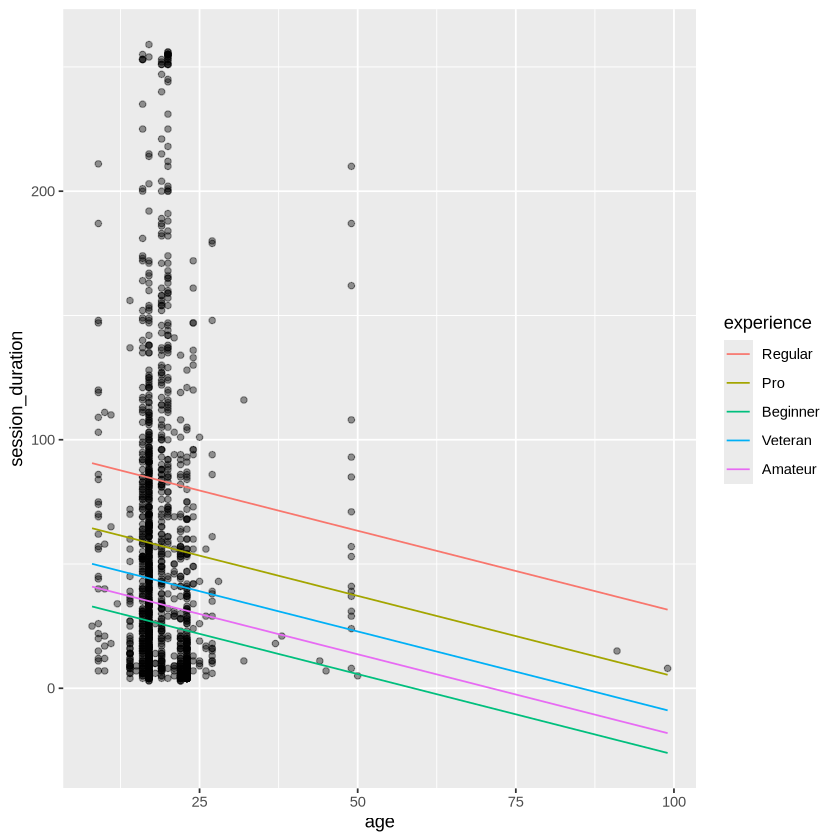

In [31]:
#made a grid that is useful in making the line in visualization because ...
ages <- joined_data |> 
        distinct(age) |> 
        pull(age)

experiences <- joined_data |> 
        distinct(experience) |> 
        pull(experience)
session_duration_prediction_grid <- expand.grid(age = ages, experience = experiences)

#session_duration_prediction_grid

sessions_duration_pred <- lm_fit |>
predict(session_duration_prediction_grid)|>
bind_cols(session_duration_prediction_grid)

final_plot <- joined_data |>
            ggplot(aes(x = age, y = session_duration))+
            geom_point(alpha = 0.4)+
            geom_line(data = sessions_duration_pred,
                      mapping = aes(x = age, y = .pred, color = experience))
            labs(x = "Age (Years)", y = "Session Duration (Minutes)")+
            theme(text = element_text(size = 12))
final_plot

In [ ]:
sessions_duration_tibble <- tibble(
    sqft = c(
        joined_data |> select(session_duration) |> min() |> select(age,
        joined_data |> select(session_duration) |> max()
    )
)
    

session_duration_preds <- lm_fit |>
  predict(session_duration_prediction_grid) |>
  bind_cols(session_duration_prediction_grid)
    

#final_plot <- joined_data |>
    #        ggplot(aes(x = age, y = experience))+
    #        geom_point(alpha = 0.4)+
    #        geom_line(data = session_duration_prediction_grid,
#            mapping = aes (x = age, y = .pred, color = experience)

colnames(joined_data)

## Discussion

### Summarizing what we found
...

### Expected findings vs outcome
...

### What impact could such findings have?
...

### What future questions could this lead to?
...